## TP 1

Le TP est en deux parties, une première partie sur papier et une seconde où on s'intéressera aux variables aléatoires et à leur représentation en fréquence.

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

### Moyenne et variance

Soit $x_1$ une variable aléatoire de moyenne $m_1$ et de variance $\sigma_1^2$.
  * Quel est la moyenne et la variance de la v.a. $y = a x_1$

\begin{align}
E(y) =&  E(a x_1) \\
=& \sum_{x_i, p_i \in A_1\times P_1}  a x_i p_i \\
=& a \sum_{x_i, p_i \in A_1\times P_1}  x_i p_i \\
=& a E(x_1) = a m_1 
\end{align}

\begin{align}
Var(y) =& Var(a x_1) \\
=& \sum_{x_i, p_i \in A_1\times P_1} p_i (a x_1)^2 - E(y)^2 \\
=& a^2 \sum_{x_i, p_i \in A_1\times P_1} p_i x_1^2 - a^2 E(x_1)^2  \\
=& a^2 Var(x_1) \\
\end{align}

  * Quel est la moyenne et la variance  de la v.a. $y = a + x_1$  
\begin{align}
E(y) =&  E(a + x_1) \\
=& \sum_{x_i, p_i \in A_1\times P_1}  (a + x_i) p_i \\
=& a + \sum_{x_i, p_i \in A_1\times P_1}  x_i p_i \\
=& a + E(x_1) = a + m_1 
\end{align}

\begin{align}
Var(y) =& Var(a + x_1) \\
=& \sum_{x_i, p_i \in A_1\times P_1} p_i (a + x_1)^2 - E(y)^2 \\
=& \sum_{x_i, p_i \in A_1\times P_1} p_i (a^2 + 2 a x_1 + x_1^2) - (a+m_1)^2 \\
=& \sum_{x_i, p_i \in A_1\times P_1} p_i a^2 + \sum_{x_i, p_i \in A_1\times P_1} p_i 2 a x_1 + \sum_{x_i, p_i \in A_1\times P_1} p_i x_1^2 - a^2 - 2 a m_1  - m_1^2 \\
=& a^2 + 2am_1 + Var(x_1) - a^2 -  2 a m_1 \\
=& Var(x_1)
\end{align}


  * Quel est la moyenne et la variance de la v.a. $y=a+bx_1$
Idem :

\begin{align}
E(y) =&  E(a + b x_1) \\
=& a + b E(x_1) = a + b m_1 
\end{align}

\begin{align}
Var(y) =& Var(a + b x_1) \\
=& b^2 Var(x_1)
\end{align}


  * Comment définir une nouvelle v.a. à partir de $x_1$ dont la moyenne serait $0$ et la variance $1$.

Soient $x_1$ et $x_2$ deux variables indépendantes aléatoires de moyenne $m_1$, $m_2$ et de variance $\sigma_1^2$ et $\sigma_2^2$. On définit la variable $y = x_1 + x_2$.

  * Quel est la valeur moyenne de $y$ ?
\begin{align}
E(y) =&  E(x_1) + E(x_2)
\end{align}

  * Quel est la variance de $y$ ?
\begin{align}
Var(y) =& Var(x_1) + Var(x_2)
\end{align}  

On considère maintenant que $x_1$ et $x_2$ ne sont pas indépendants, reprendre les deux précédentes questions.

\begin{align}
E(y) =&  E(x_1) + E(x_2)
\end{align}

\begin{align}
Var(y) =& Var(x_1) + Var(x_2)  + 2  Cov(x_1, x_2)
\end{align}  


### Histogramme, fréquence, distribution

Le but du TP est d'étudier comment en comptant les variables aléatoires on retrouve bien les distributions attendues

In [1]:
# import
import numpy as np
import matplotlib.pyplot as pp

In [2]:
import matplotlib as mpl
try :
    import seaborn as sns

    sns.set()
    sns.set_style("whitegrid")
    sns.set_context("poster")
    raise ImportError
except ImportError:
    print("seaborn makes nice plots easier")

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 17
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

%matplotlib inline

seaborn makes nice plots easier


In [3]:
# Générer des nombres aléatoires uniformes [0,1]
va = np.random.random(10000)
print(va)

[0.06696302 0.11499099 0.41961301 ... 0.33228237 0.99727379 0.17398238]


Ici il va falloir écrire une fonction calculant l'histogramme de l'échantillon de données. On donnera en paramètre Binf et Bsup, les bornes inférieurs et supérieurs de l'histogramme ainsi que le nombre de cases.
On renverra dans un tableau à deux indices, d'une part la coordonnée des cases et le nombre de variables dans la case. On renverra également le facteur de normalisation : l'aire sous la courbe de l'histogramme. Pour calculer l'histogramme, on pourra utiliser l'identité suivante: pour un échantillon $x$, il existe un entier $i$ tel que

$$
  {\rm Binf} + \delta i \leq x < {\rm Binf} + \delta (i+1)
$$

où $\delta$ est la taille de la case.

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Écrire une fonction calculant l'histogramme de l'échantillon de données

In [ ]:
# faire un histogramme
def count_elements(seq, BInf,BSup, NBins):
    # TODO renvoyer l'histogramme et la norme
    hist = 0
    norm = 1
    return hist, norm

EPSILON = 0.001
BInf = min(va)
BSup = max(va) + EPSILON
NBins = 10

h1, norm = count_elements(va, BInf, BSup, NBins)
print(h1)
print(h1/norm)

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [4]:
# faire un histogramme
def count_elements(seq, BInf, BSup, NBins):
    delta = (BSup - BInf) / NBins
    hist = np.zeros(NBins)
    idx_list = [int( (e - BInf) / delta) for e in seq]
    for idx in idx_list:
        hist[idx] += 1
    norm = delta * np.sum(hist)
    return hist, norm

EPSILON = 0.001
BInf = min(va)
BSup = max(va) + EPSILON
NBins = 10

h1, norm = count_elements(va, BInf, BSup, NBins)
print(h1)
print(h1/norm)

[ 991.  966. 1011. 1025. 1018.  955.  995.  992. 1048.  999.]
[0.99016749 0.96518849 1.01015069 1.02413893 1.01714481 0.95419773
 0.99416413 0.99116665 1.0471196  0.99816077]


<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

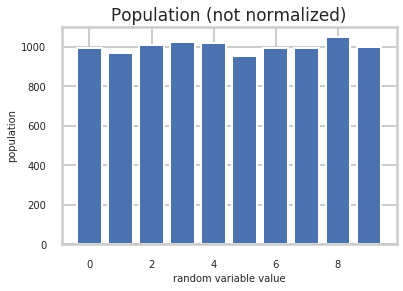

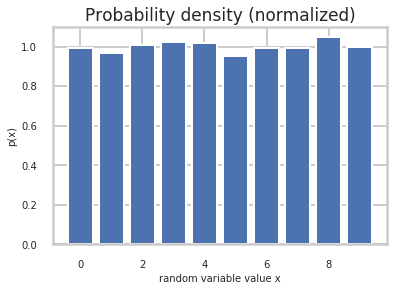

In [5]:
pp.bar(list(range(NBins)), h1)
pp.title('Population (not normalized)')
pp.ylabel('population')
pp.xlabel('random variable value')
pp.show()

pp.bar(list(range(NBins)), h1/norm)
pp.title('Probability density (normalized)')
pp.ylabel('p(x)')
pp.xlabel('random variable value x')
pp.show()

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

Tester la fonction pour des variables gaussiennes

In [ ]:
# variables gaussiennes
va_normal = np.random.normal(size=(100000))
# Tester la fonction pour des variables gaussiennes
# TODO : variable h2 with histogram of normal 
# TODO : variable norm with the normalization factor
EPSILON = 0.01

def gauss(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2.0)

pp.plot(xrange, h2 / norm, label='histogram')
pp.plot(xrange, gauss(xrange), label='gauss')
pp.legend()
pp.show()

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

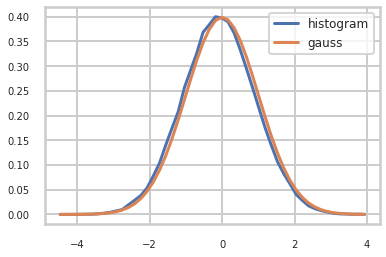

In [6]:
# variables gaussiennes
EPSILON = 0.01
va_normal = np.random.normal(size=(100000))
Bsup = max(va_normal) + EPSILON
Binf = min(va_normal) - EPSILON
NBins = 50
δ = (Bsup - Binf) / NBins
xrange = np.arange(Binf, Bsup, δ)
h2, norm = count_elements(va_normal, Binf, Bsup, NBins)

def gauss(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2.0)

pp.plot(xrange, h2 / norm, label='histogram')
pp.plot(xrange, gauss(xrange), label='gauss')
pp.legend()
pp.show()

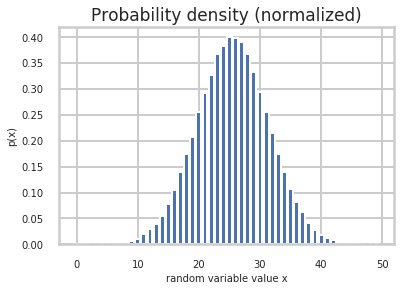

In [7]:
pp.bar(list(range(NBins)), h2/norm)
pp.title('Probability density (normalized)')
pp.ylabel('p(x)')
pp.xlabel('random variable value x')
pp.show()

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

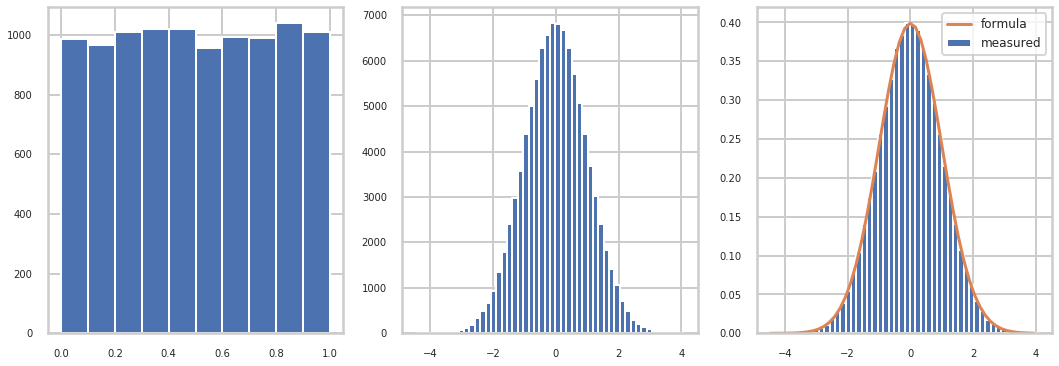

In [8]:
# numpy sait le faire
# vérifier la fonction de répartition : faire un histogramme
f,ax = pp.subplots(1, 3, figsize=(18, 6))
ax[0].hist(va, range=(0,1), bins=10)
ax[1].hist(va_normal, bins=50)
ax[2].hist(va_normal, bins=50, density=True, label='measured')
ax[2].plot(xrange, gauss(xrange), label='formula')
pp.legend()
pp.show()

\begin{align}
    p(x,y) &= p(x|y)p(y) \\
    p(y) & \sim unif(-1,1) \\
    p(x|y) &= Normal(-5,1)\theta(y) + Normal(5,1)\theta(-y) 
\end{align}

où $\theta(y)$ est la fonction de Heaviside

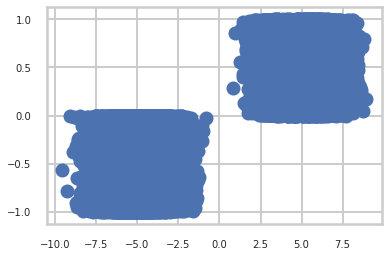

In [9]:
va_y = np.random.random(size=(100000))*2-1
va_x = np.zeros(va_y.shape[0])
yneg = np.where(va_y < 0)
ypos = np.where(va_y >= 0)
va_x[yneg[0]] = np.random.normal(-5,size=(len(yneg[0])))
va_x[ypos[0]] = np.random.normal(5,size=(len(ypos[0])))

pp.scatter(va_x,va_y)
pp.show()

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

plotter un histogramme 2D (cf `pp.hist2d`)

In [10]:
# plotter un histogramme 2D (cf pp.hist2d)


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

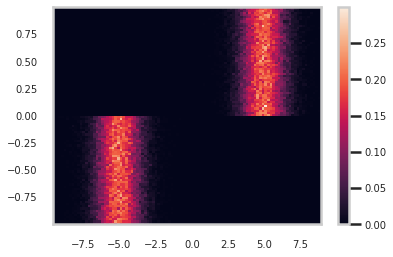

In [11]:
# plotter un histogramme 2D (cf pp.hist2d)
pp.hist2d(va_x, va_y, bins=100, density=True )
pp.colorbar()
pp.show()

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

On veut voir comment la moyenne converge vers la valeur théorique en fonction du nombre d'échantillon utilisé. Pour chaque valeur de Nva, calculer la moyenne d'autant de variables de bernouilli et enregistrer le résultat dans arr_mean.
On observera le résultat sur une échelle log-log

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

pour chaque valeur i de Nva, générer 1000 fois 'i' variable de bernoulli. Enregistrer les valeur dans un tableau

In [ ]:
# Loi des gds nombres et convergence
# commençons par des variables de bernoulli
Nva = 10**np.arange(1,8,0.2)
arr_mean = []

# pour chaque valeur i de Nva, générer 1000 fois 'i' variable de bernoulli. Enregistrer les valeur dans un tableau


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [12]:
# Loi des gds nombres et convergence
# commençons par des variables de bernoulli
Nva = 10**np.arange(1,5,0.2)
arr_mean = []

# pour chaque valeur i de Nva, générer 1000 fois 'i' variable de bernoulli. Enregistrer les valeur dans un tableau
def generate_1000_bernoulli(size):
    many_bernoulli = [np.random.randint(2 , size=int(size)) for _ in range(1000)]
    return many_bernoulli

for n in Nva:
    many_bernoulli = generate_1000_bernoulli(n)
    arr_mean.append( np.mean([np.mean(var_bernoulli) for var_bernoulli in many_bernoulli]) )
arr_mean = np.array(arr_mean)


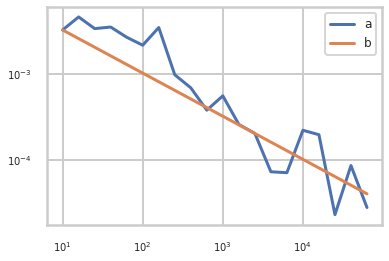

In [13]:

# test
pp.loglog(Nva, np.abs(arr_mean-0.5), label='a')
pp.loglog(Nva, Nva**(-0.5)/Nva[0]**(-0.5)*np.abs(arr_mean-0.5)[0], label='b')
pp.legend()
pp.show()

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

On veut maintenant comprendre comment est distribué l'estimateur de la moyenne. On va donc générer `n_var` fois, `n_sum` variables aléatoire de bernouilli et calculer la valeur moyenne. Vous calculerez ensuite l'histogramme de ces `n_var` estimations de la moyenne en renormalisant correctement la variable.

/home/estrade/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


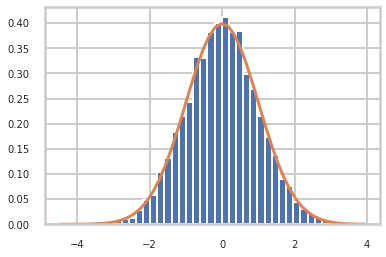

In [14]:
# somme de variables aléatoire
n_var = 10000 # nombre d'estimation de la valeur moyenne
n_sum = 10000 # nombre de variable aléatoire utilisé pour la somme
est_m = []
# générer n_var estimation de la valeur moyenne d'un processus de n_sum variables bernoulli sommé
for i in range(n_var):
    est_m = np.append(est_m,np.sum(np.random.randint(2,size=(n_sum))))

# test
Z = np.sqrt(n_sum) * (est_m / n_sum - 0.5) / 0.5;
pp.hist(Z,bins=40,normed=True)
pp.plot(xrange,gauss(xrange))
pp.show()

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

Il n'y as pas d'explication donnée pour 
```python
Z = np.sqrt(n_sum)*(est_m/n_sum - 0.5)/0.5;
```

Avec Z on passe les abscisses en nombre de sigma au lieu de probabilité.

https://en.wikipedia.org/wiki/Standard_deviation#Rules_for_normally_distributed_data

https://fr.wikipedia.org/wiki/R%C3%A8gle_68-95-99.7

TODO : Il faudrait améliorer ça dans le sujet.
